<a href="https://colab.research.google.com/github/zertyone-543/workshop04/blob/main/zeneb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Importer le fichier kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zenebmzaoui","key":"c8297124df9c095700b2ffda213c8ceb"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset


Dataset URL: https://www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset
License(s): CC-BY-SA-4.0


In [ ]:
!unzip the-oxfordiiit-pet-dataset.zip -d /content/OxfordPetDataset/


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/OxfordPetDataset/images/images/leonberger_81.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_82.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_83.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_84.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_85.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_86.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_87.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_88.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_89.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_9.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_90.jpg  
  inflating: /content/OxfordPetDataset/images/images/leonberger_91.jpg  
  inflating: /content/OxfordPetDataset/images/i

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


In [ ]:
def calculer_histogramme(image_path):
    # Charger l'image
    image = cv2.imread(image_path)

    # Vérifier si l'image est chargée correctement
    if image is None:
        print(f"Erreur : Impossible de charger l'image {image_path}")
        return None

    # Convertir en RGB (OpenCV charge les images en BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Définir les couleurs
    couleurs = ('rouge', 'vert', 'bleu')
    histogrammes = {}

    # Calculer l'histogramme pour chaque canal de couleur
    for i, couleur in enumerate(couleurs):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()  # Normaliser
        histogrammes[couleur] = hist

    return histogrammes


In [ ]:
chemin_dataset = "/content/OxfordPetDataset/images/"


In [ ]:
import os

# Lister les fichiers images dans le bon dossier
fichiers_images = [f for f in os.listdir(chemin_dataset) if f.endswith(('.jpg', '.png'))]

# Afficher quelques images
print(fichiers_images[:10])  # Vérifier que la liste contient des images


['miniature_pinscher_146.jpg', 'wheaten_terrier_167.jpg', 'newfoundland_119.jpg', 'British_Shorthair_133.jpg', 'Maine_Coon_227.jpg', 'english_setter_65.jpg', 'english_cocker_spaniel_175.jpg', 'samoyed_101.jpg', 'american_pit_bull_terrier_166.jpg', 'american_pit_bull_terrier_78.jpg']


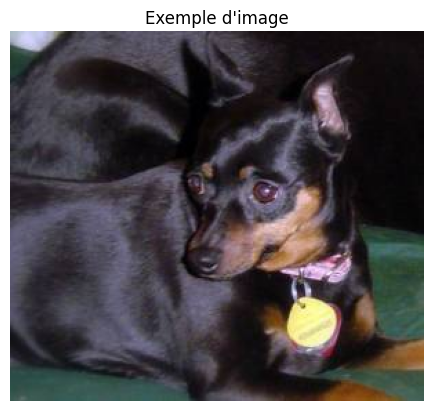

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Prendre une image au hasard
image_test = os.path.join(chemin_dataset, fichiers_images[0])

# Charger et afficher l'image
image = cv2.imread(image_test)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.title("Exemple d'image")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculer_histogramme(image_path):
    # Charger l'image
    image = cv2.imread(image_path)

    # Vérifier si l'image est chargée correctement
    if image is None:
        print(f"Erreur : Impossible de charger l'image {image_path}")
        return None

    # Convertir en RGB (OpenCV charge les images en BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Définir les couleurs
    couleurs = ('Rouge', 'Vert', 'Bleu')
    histogrammes = {}

    # Calculer l'histogramme pour chaque canal de couleur
    for i, couleur in enumerate(couleurs):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()  # Normaliser
        histogrammes[couleur] = hist

    return histogrammes


In [ ]:
# Prendre une image au hasard
image_test = os.path.join(chemin_dataset, fichiers_images[0])

# Calculer l'histogramme
histogramme_test = calculer_histogramme(image_test)

# Vérifier si l'histogramme a bien été calculé
if histogramme_test:
    print("✅ Histogramme calculé avec succès !")
else:
    print("❌ Erreur lors du calcul de l'histogramme.")


✅ Histogramme calculé avec succès !


Le fichier existe: /content/OxfordPetDataset/images/miniature_pinscher_146.jpg
L'image a été chargée avec succès : /content/OxfordPetDataset/images/miniature_pinscher_146.jpg


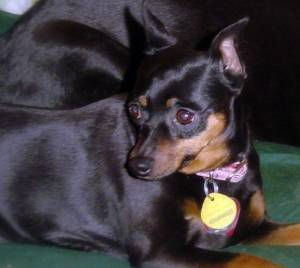

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow  # L'import doit être en haut

# Tester sur une seule image
image_test_path = os.path.join(chemin_dataset, fichiers_images[0])

# Vérifier si le fichier existe
if os.path.exists(image_test_path):
    print(f"Le fichier existe: {image_test_path}")
else:
    print(f"Le fichier n'existe pas: {image_test_path}")

# Essayer de lire l'image avec OpenCV
image_test = cv2.imread(image_test_path)

if image_test is None:
    print(f"Erreur lors du chargement de l'image : {image_test_path}")
else:
    print(f"L'image a été chargée avec succès : {image_test_path}")

    # Afficher l'image pour vérifier son contenu
    cv2_imshow(image_test)  # Utiliser cv2_imshow() dans Google Colab


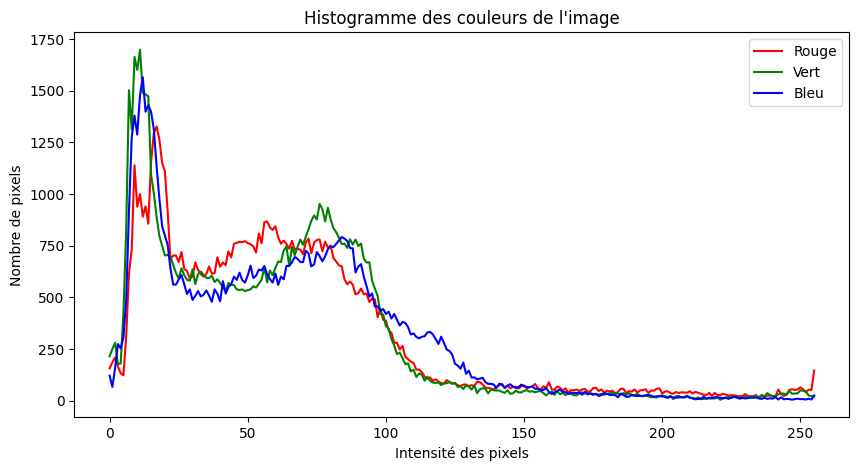

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Vérifier si l'image a été chargée correctement
if image_test is not None:
    # Séparer les canaux de couleur (BGR dans OpenCV)
    canal_bleu, canal_vert, canal_rouge = cv2.split(image_test)

    # Calculer les histogrammes pour chaque canal (256 bins, valeurs entre 0 et 255)
    hist_bleu = cv2.calcHist([canal_bleu], [0], None, [256], [0, 256])
    hist_vert = cv2.calcHist([canal_vert], [0], None, [256], [0, 256])
    hist_rouge = cv2.calcHist([canal_rouge], [0], None, [256], [0, 256])

    # Afficher les histogrammes
    plt.figure(figsize=(10, 5))
    plt.plot(hist_rouge, color='red', label="Rouge")
    plt.plot(hist_vert, color='green', label="Vert")
    plt.plot(hist_bleu, color='blue', label="Bleu")
    plt.title("Histogramme des couleurs de l'image")
    plt.xlabel("Intensité des pixels")
    plt.ylabel("Nombre de pixels")
    plt.legend()
    plt.show()
else:
    print("Erreur : L'image n'a pas été chargée correctement.")


In [ ]:
import pandas as pd

# Liste pour stocker les histogrammes
donnees_histogramme = []

# Parcourir toutes les images du dataset
for fichier in fichiers_images:
    image_path = os.path.join(chemin_dataset, fichier)

    # Charger l'image
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Erreur : Impossible de charger l'image {fichier}")
        continue  # Passer à l'image suivante

    # Séparer les canaux de couleur
    canal_bleu, canal_vert, canal_rouge = cv2.split(image)

    # Calculer les histogrammes
    hist_bleu = cv2.calcHist([canal_bleu], [0], None, [256], [0, 256]).flatten()
    hist_vert = cv2.calcHist([canal_vert], [0], None, [256], [0, 256]).flatten()
    hist_rouge = cv2.calcHist([canal_rouge], [0], None, [256], [0, 256]).flatten()

    # Ajouter les données sous forme de liste
    donnees_histogramme.append([fichier] + hist_rouge.tolist() + hist_vert.tolist() + hist_bleu.tolist())

# Créer un DataFrame Pandas
colonnes = ["Nom_Image"] + [f"Rouge_{i}" for i in range(256)] + [f"Vert_{i}" for i in range(256)] + [f"Bleu_{i}" for i in range(256)]
df_histogramme = pd.DataFrame(donnees_histogramme, columns=colonnes)

# Sauvegarder en CSV
df_histogramme.to_csv("histogrammes_couleur.csv", index=False)

print("✅ Histogrammes de toutes les images enregistrés dans histogrammes_couleur.csv")


❌ Erreur : Impossible de charger l'image Egyptian_Mau_145.jpg
❌ Erreur : Impossible de charger l'image Egyptian_Mau_139.jpg
❌ Erreur : Impossible de charger l'image Egyptian_Mau_177.jpg
❌ Erreur : Impossible de charger l'image Egyptian_Mau_191.jpg
❌ Erreur : Impossible de charger l'image Abyssinian_34.jpg
❌ Erreur : Impossible de charger l'image Egyptian_Mau_167.jpg
✅ Histogrammes de toutes les images enregistrés dans histogrammes_couleur.csv


In [ ]:
import os

# Vérifier si les fichiers existent
for fichier in ["Egyptian_Mau_177.jpg", "Egyptian_Mau_145.jpg", "Abyssinian_34.jpg",
                "Egyptian_Mau_167.jpg", "Egyptian_Mau_191.jpg", "Egyptian_Mau_139.jpg"]:
    image_path = os.path.join(chemin_dataset, fichier)
    if os.path.exists(image_path):
        print(f"✅ Fichier trouvé : {image_path}")
    else:
        print(f"❌ Fichier manquant : {image_path}")


✅ Fichier trouvé : /content/OxfordPetDataset/images/Egyptian_Mau_177.jpg
✅ Fichier trouvé : /content/OxfordPetDataset/images/Egyptian_Mau_145.jpg
✅ Fichier trouvé : /content/OxfordPetDataset/images/Abyssinian_34.jpg
✅ Fichier trouvé : /content/OxfordPetDataset/images/Egyptian_Mau_167.jpg
✅ Fichier trouvé : /content/OxfordPetDataset/images/Egyptian_Mau_191.jpg
✅ Fichier trouvé : /content/OxfordPetDataset/images/Egyptian_Mau_139.jpg


In [ ]:
from PIL import Image

for fichier in ["Egyptian_Mau_177.jpg", "Egyptian_Mau_145.jpg", "Abyssinian_34.jpg",
                "Egyptian_Mau_167.jpg", "Egyptian_Mau_191.jpg", "Egyptian_Mau_139.jpg"]:
    image_path = os.path.join(chemin_dataset, fichier)

    try:
        img = Image.open(image_path)
        img.show()  # Affiche l’image
        print(f"✅ Image {fichier} ouverte avec succès")
    except Exception as e:
        print(f"❌ Erreur lors de l'ouverture de {fichier} : {e}")


✅ Image Egyptian_Mau_177.jpg ouverte avec succès
✅ Image Egyptian_Mau_145.jpg ouverte avec succès
✅ Image Abyssinian_34.jpg ouverte avec succès
✅ Image Egyptian_Mau_167.jpg ouverte avec succès
✅ Image Egyptian_Mau_191.jpg ouverte avec succès
✅ Image Egyptian_Mau_139.jpg ouverte avec succès


In [ ]:
for fichier in ["Egyptian_Mau_177.jpg", "Egyptian_Mau_145.jpg", "Abyssinian_34.jpg",
                "Egyptian_Mau_167.jpg", "Egyptian_Mau_191.jpg", "Egyptian_Mau_139.jpg"]:
    image_path = os.path.join(chemin_dataset, fichier)

    try:
        img = Image.open(image_path)
        print(f"📷 {fichier} - Format: {img.format}, Taille: {img.size}, Mode: {img.mode}")
    except Exception as e:
        print(f"❌ Erreur lors de l'ouverture de {fichier} : {e}")


📷 Egyptian_Mau_177.jpg - Format: GIF, Taille: (246, 175), Mode: P
📷 Egyptian_Mau_145.jpg - Format: GIF, Taille: (216, 188), Mode: P
📷 Abyssinian_34.jpg - Format: GIF, Taille: (250, 202), Mode: P
📷 Egyptian_Mau_167.jpg - Format: GIF, Taille: (183, 275), Mode: P
📷 Egyptian_Mau_191.jpg - Format: GIF, Taille: (300, 214), Mode: P
📷 Egyptian_Mau_139.jpg - Format: GIF, Taille: (350, 250), Mode: P


In [ ]:
from PIL import Image
import os

# Convertir et sauvegarder les images en RGB
for fichier in ["Egyptian_Mau_177.jpg", "Egyptian_Mau_145.jpg", "Abyssinian_34.jpg",
                "Egyptian_Mau_167.jpg", "Egyptian_Mau_191.jpg", "Egyptian_Mau_139.jpg"]:
    image_path = os.path.join(chemin_dataset, fichier)

    try:
        # Ouvrir l'image
        img = Image.open(image_path)

        # Vérifier si l'image est en mode "P" (palette)
        if img.mode == "P":
            img = img.convert("RGB")  # Convertir en RGB

        # Sauvegarder l'image en RGB
        img.save(image_path)
        print(f"✅ Image {fichier} convertie en RGB et sauvegardée")

    except Exception as e:
        print(f"❌ Erreur lors de la conversion de {fichier} : {e}")


✅ Image Egyptian_Mau_177.jpg convertie en RGB et sauvegardée
✅ Image Egyptian_Mau_145.jpg convertie en RGB et sauvegardée
✅ Image Abyssinian_34.jpg convertie en RGB et sauvegardée
✅ Image Egyptian_Mau_167.jpg convertie en RGB et sauvegardée
✅ Image Egyptian_Mau_191.jpg convertie en RGB et sauvegardée
✅ Image Egyptian_Mau_139.jpg convertie en RGB et sauvegardée


In [ ]:
import cv2
import os
import pandas as pd
import numpy as np

# Fonction pour calculer l'histogramme de couleur d'une image
def calculer_histogramme(image_path):
    # Lire l'image
    image = cv2.imread(image_path)

    # Vérifier si l'image a été chargée correctement
    if image is None:
        print(f"❌ Impossible de charger l'image : {image_path}")
        return None

    # Calculer les histogrammes pour chaque canal de couleur
    hist_rouge = cv2.calcHist([image], [2], None, [256], [0, 256])
    hist_vert = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_bleu = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normaliser les histogrammes pour obtenir une échelle uniforme
    hist_rouge = hist_rouge.flatten()  # Aplatir pour un format simple
    hist_vert = hist_vert.flatten()
    hist_bleu = hist_bleu.flatten()

    return hist_rouge, hist_vert, hist_bleu

# Créer une liste pour stocker les données
donnees_histogramme = []

# Parcourir toutes les images du dataset
for fichier in fichiers_images:
    image_path = os.path.join(chemin_dataset, fichier)

    # Calculer l'histogramme de couleur
    histogramme = calculer_histogramme(image_path)

    if histogramme:
        hist_rouge, hist_vert, hist_bleu = histogramme

        # Ajouter au tableau
        donnees_histogramme.append([fichier] + hist_rouge.tolist() + hist_vert.tolist() + hist_bleu.tolist())

# Créer un DataFrame Pandas
colonnes = ["Nom_Image"] + [f"Rouge_{i}" for i in range(256)] + [f"Vert_{i}" for i in range(256)] + [f"Bleu_{i}" for i in range(256)]
df_histogramme = pd.DataFrame(donnees_histogramme, columns=colonnes)

# Sauvegarder les histogrammes dans un fichier CSV
df_histogramme.to_csv("histogrammes_couleur.csv", index=False)

print("✅ Histogrammes de toutes les images enregistrés dans histogrammes_couleur.csv")


✅ Histogrammes de toutes les images enregistrés dans histogrammes_couleur.csv


In [ ]:
import pandas as pd

# Charger le fichier CSV contenant les histogrammes de couleur
df_histogramme = pd.read_csv("histogrammes_couleur.csv")

# Afficher tout le contenu du DataFrame (attention si le fichier est très grand, cela peut être lent)
print(df_histogramme)


                       Nom_Image  Rouge_0  Rouge_1  Rouge_2  Rouge_3  Rouge_4  \
0     miniature_pinscher_146.jpg    156.0    185.0    209.0    164.0    132.0   
1        wheaten_terrier_167.jpg      0.0      0.0      3.0     12.0     29.0   
2           newfoundland_119.jpg     36.0     23.0    116.0   1336.0   1990.0   
3      British_Shorthair_133.jpg     95.0     71.0     85.0    120.0    161.0   
4             Maine_Coon_227.jpg   2909.0  12734.0   1215.0    787.0   1000.0   
...                          ...      ...      ...      ...      ...      ...   
7385              Birman_184.jpg    927.0    813.0    757.0    844.0    855.0   
7386         Egyptian_Mau_36.jpg      3.0      1.0      1.0      4.0      7.0   
7387       japanese_chin_186.jpg    968.0    572.0    723.0    856.0    821.0   
7388   miniature_pinscher_26.jpg     10.0     11.0     21.0     32.0     52.0   
7389     wheaten_terrier_134.jpg      9.0      4.0      7.0      3.0      6.0   

      Rouge_5  Rouge_6  Rou

In [ ]:
# Sauvegarder le DataFrame dans un nouveau fichier CSV si nécessaire
df_histogramme.to_csv("histogrammes_complets.csv", index=False)


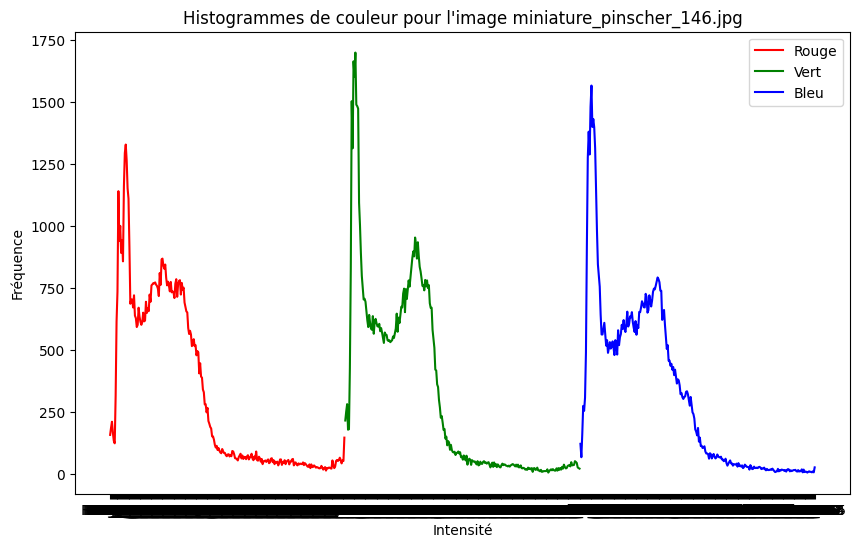

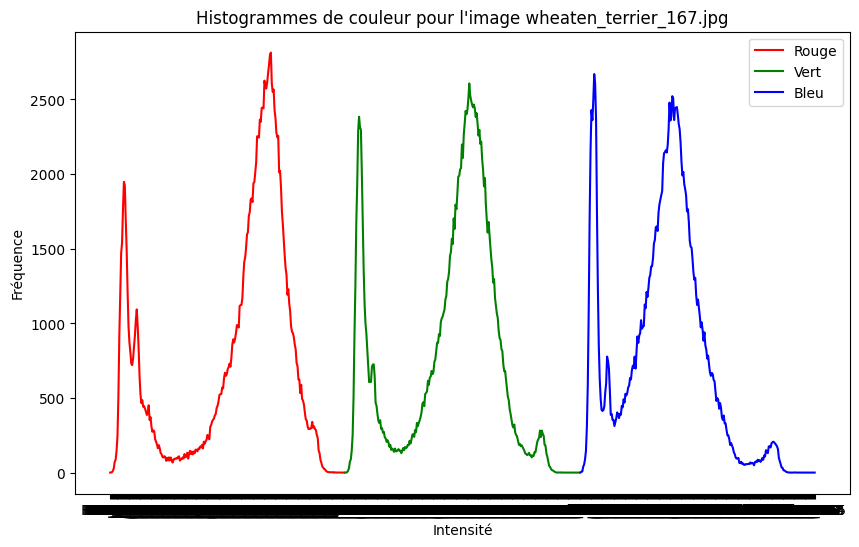

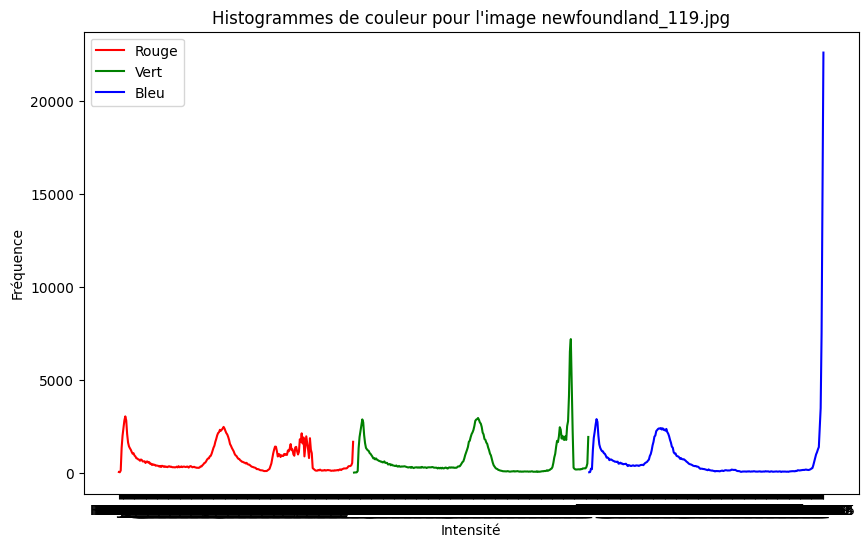

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Boucle pour afficher l'histogramme pour chaque image
for idx, row in df_histogramme.iterrows():
    image_nom = row['Nom_Image']
    hist_rouge = row[1:257]  # Canal Rouge
    hist_vert = row[257:513]  # Canal Vert
    hist_bleu = row[513:769]  # Canal Bleu

    plt.figure(figsize=(10, 6))
    plt.plot(hist_rouge, color='red', label='Rouge')
    plt.plot(hist_vert, color='green', label='Vert')
    plt.plot(hist_bleu, color='blue', label='Bleu')
    plt.title(f"Histogrammes de couleur pour l'image {image_nom}")
    plt.xlabel("Intensité")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd

# Afficher toutes les lignes dans le fichier CSV sans troncature
pd.set_option('display.max_rows', None)  # Ne pas tronquer les lignes
pd.set_option('display.max_columns', None)  # Ne pas tronquer les colonnes
df_histogramme


Buffered data was truncated after reaching the output size limit.